In [1]:
import pandas as pd

!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv

--2023-02-02 02:59:15--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191962 (187K) [text/csv]
Saving to: ‘abalone.csv’

abalone.csv         100%[===================>] 187.46K   633KB/s    in 0.3s    

2023-02-02 02:59:16 (633 KB/s) - ‘abalone.csv’ saved [191962/191962]



# Read in Abalone data

In [27]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [31]:
matrix = df.loc[:, df.columns != "Sex"]
data = matrix.to_numpy()

In [35]:
np.cov?

In [33]:
cov = np.cov(data.T)

cov.shape

(8, 8)

In [36]:
data = data - np.mean(data, axis=0)

In [45]:
eigen_values, eigen_vectors = np.linalg.eig(cov)
eigen_vectors

array([[-2.10513202e-02,  1.83052752e-01, -7.42040211e-01,
         9.06887398e-02,  3.07007218e-02, -6.18893826e-01,
         1.52311416e-01, -5.43508715e-03],
       [-1.79401219e-02,  1.48804192e-01, -5.96175335e-01,
         4.20854302e-02, -2.33409653e-02,  7.83141972e-01,
         7.49734266e-02, -2.93613363e-02],
       [-7.31629638e-03,  5.24595599e-02, -1.40358287e-01,
        -3.71173260e-02, -1.45782231e-03, -4.21715859e-02,
        -9.10437257e-01, -3.81365645e-01],
       [-8.36804920e-02,  8.34461310e-01,  2.28847916e-01,
        -2.20616051e-01,  1.25570884e-01, -2.50039224e-03,
         1.82698066e-01, -3.82722100e-01],
       [-2.97346596e-02,  3.99951598e-01,  1.36354791e-01,
         7.54544047e-01, -3.31709499e-01,  5.43703582e-03,
        -1.68819392e-01,  3.35655300e-01],
       [-1.74599170e-02,  1.83252786e-01, -7.74498237e-03,
        -7.33235758e-02,  7.56051666e-01,  2.91035964e-02,
        -2.30202123e-01,  5.78984522e-01],
       [-2.74311519e-02,  2.052724

In [46]:
eigen_values

array([1.04954314e+01, 2.39268823e-01, 3.02087647e-03, 2.60218996e-03,
       1.05068657e-03, 1.47688518e-04, 4.88782005e-04, 4.17493194e-04])

In [42]:
k = 2 # for example, let's keep 2 components
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
w = np.hstack((eigen_pairs[i][1][:, np.newaxis]) for i in range(k))


<ipython-input-42-1da948dec81e>:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  w = np.hstack((eigen_pairs[i][1][:, np.newaxis]) for i in range(k))


array([[-0.02105132,  0.18305275],
       [-0.01794012,  0.14880419],
       [-0.0073163 ,  0.05245956],
       [-0.08368049,  0.83446131],
       [-0.02973466,  0.3999516 ],
       [-0.01745992,  0.18325279],
       [-0.02743115,  0.20527245],
       [-0.99510682, -0.0979371 ]])

In [39]:
X_pca = data.dot(w)
X_pca

array([[-5.00480331, -0.86692655],
       [ 2.99106199, -0.43457164],
       [ 0.94603495, -0.08673867],
       ...,
       [ 0.88806992,  0.5087862 ],
       [-0.0998919 ,  0.34089986],
       [-2.18474351,  1.11378693]])

(array([  5.,   6.,   1.,   3.,   8.,   7.,  15.,  14.,  35.,  58.,  90.,
         89., 134., 215., 307., 302., 245., 250., 234., 218., 202., 181.,
        185., 163., 179., 169., 145., 133.,  92., 104.,  86.,  52.,  65.,
         33.,  34.,  21.,  12.,  22.,  15.,   8.,  10.,   6.,   9.,   5.,
          1.,   3.,   2.,   2.,   0.,   2.]),
 array([-1.43196912, -1.36161026, -1.29125141, -1.22089256, -1.15053371,
        -1.08017486, -1.00981601, -0.93945716, -0.86909831, -0.79873946,
        -0.7283806 , -0.65802175, -0.5876629 , -0.51730405, -0.4469452 ,
        -0.37658635, -0.3062275 , -0.23586865, -0.1655098 , -0.09515094,
        -0.02479209,  0.04556676,  0.11592561,  0.18628446,  0.25664331,
         0.32700216,  0.39736101,  0.46771987,  0.53807872,  0.60843757,
         0.67879642,  0.74915527,  0.81951412,  0.88987297,  0.96023182,
         1.03059067,  1.10094953,  1.17130838,  1.24166723,  1.31202608,
         1.38238493,  1.45274378,  1.52310263,  1.59346148,  1.66382033,
 

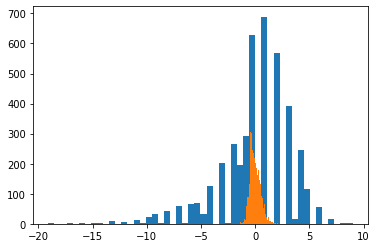

In [49]:
plt.hist(X_pca[:, 0], bins=50)
plt.hist(X_pca[:, 1], bins=50)

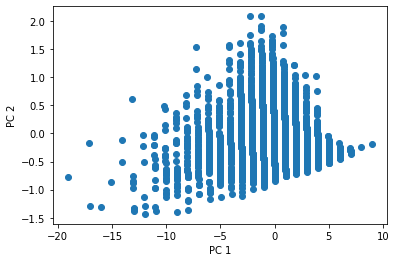

In [41]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()